In [1]:
!pip install transformers==4.45.2
!pip install --quiet datasets[audio] accelerate evaluate jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
# from huggingface_hub import notebook_login
# notebook_login() -- Doesn't work in Kaggle

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
huggingface_token = user_secrets.get_secret("huggingface")
!mkdir -p ~/.cache/huggingface
!echo -n $huggingface_token > ~/.cache/huggingface/token

In [4]:
# lets verify
!huggingface-cli whoami

Ailurus


In [5]:
from datasets import load_dataset, DatasetDict

common_voice = DatasetDict()

common_voice["train"] = load_dataset(
    "mozilla-foundation/common_voice_17_0",
    "ru",
    split="train+validation",
    trust_remote_code=True
)

common_voice["test"] = load_dataset(
    "mozilla-foundation/common_voice_17_0",
    "ru",
    split="test",
    trust_remote_code=True
)

common_voice = common_voice.remove_columns(
    [
        "accent",
        "age",
        "client_id",
        "down_votes",
        "gender",
        "locale",
        "path",
        "segment",
        "up_votes"
    ]
)

print(common_voice)

common_voice_17_0.py:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/132k [00:00<?, ?B/s]

n_shards.json:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

ru_train_0.tar:   0%|          | 0.00/976M [00:00<?, ?B/s]

ru_dev_0.tar:   0%|          | 0.00/392M [00:00<?, ?B/s]

ru_test_0.tar:   0%|          | 0.00/397M [00:00<?, ?B/s]

ru_other_0.tar:   0%|          | 0.00/597M [00:00<?, ?B/s]

ru_invalidated_0.tar:   0%|          | 0.00/387M [00:00<?, ?B/s]

ru_validated_0.tar:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

ru_validated_1.tar:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

ru_validated_2.tar:   0%|          | 0.00/1.60G [00:00<?, ?B/s]

ru_validated_3.tar:   0%|          | 0.00/1.38G [00:00<?, ?B/s]

ru_validated_4.tar:   0%|          | 0.00/114M [00:00<?, ?B/s]

transcript/ru/train.tsv:   0%|          | 0.00/9.85M [00:00<?, ?B/s]

transcript/ru/dev.tsv:   0%|          | 0.00/3.73M [00:00<?, ?B/s]

transcript/ru/test.tsv:   0%|          | 0.00/3.64M [00:00<?, ?B/s]

transcript/ru/other.tsv:   0%|          | 0.00/6.55M [00:00<?, ?B/s]

transcript/ru/invalidated.tsv:   0%|          | 0.00/3.79M [00:00<?, ?B/s]

validated.tsv:   0%|          | 0.00/61.3M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 9438it [00:00, 94332.41it/s]
Reading metadata...: 26377it [00:00, 92621.36it/s]


Generating validation split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10203it [00:00, 98956.62it/s] 


Generating test split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10203it [00:00, 97959.49it/s] 


Generating other split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 17456it [00:00, 96843.95it/s][A


Generating invalidated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10018it [00:00, 87444.25it/s][A


Generating validated split: 0 examples [00:00, ? examples/s]


Reading metadata...: 0it [00:00, ?it/s]
Reading metadata...: 10247it [00:00, 102459.84it/s]
Reading metadata...: 20493it [00:00, 101381.85it/s]
Reading metadata...: 30632it [00:00, 96446.06it/s] 
Reading metadata...: 40302it [00:00, 93398.30it/s]
Reading metadata...: 49663it [00:00, 92936.29it/s]
Reading metadata...: 58969it [00:00, 92238.15it/s]
Reading metadata...: 68200it [00:00, 90177.18it/s]
Reading metadata...: 77373it [00:00, 90653.25it/s]
Reading metadata...: 86689it [00:00, 91414.70it/s]
Reading metadata...: 95838it [00:01, 91277.30it/s]
Reading metadata...: 105111it [00:01, 91714.15it/s]
Reading metadata...: 114287it [00:01, 91014.16it/s]
Reading metadata...: 123447it [00:01, 91187.44it/s]
Reading metadata...: 132569it [00:01, 87883.95it/s]
Reading metadata...: 141606it [00:01, 88607.06it/s]
Reading metadata...: 150487it [00:01, 87589.65it/s]
Reading metadata...: 163387it [00:01, 90985.15it/s]


DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence', 'variant'],
        num_rows: 36580
    })
    test: Dataset({
        features: ['audio', 'sentence', 'variant'],
        num_rows: 10203
    })
})


In [6]:
from transformers import (
    WhisperFeatureExtractor,
    WhisperTokenizer,
    WhisperProcessor,
    WhisperForConditionalGeneration
)

hf_model_name = "openai/whisper-tiny"

model = WhisperForConditionalGeneration.from_pretrained(hf_model_name)
feature_extractor = WhisperFeatureExtractor.from_pretrained(hf_model_name)
tokenizer = WhisperTokenizer.from_pretrained(hf_model_name, language="russian", task="transcribe")
processor = WhisperProcessor.from_pretrained(hf_model_name, language="russian", task="transcribe")

model.generation_config.language = "russian"
model.generation_config.task = "transcribe"
model.generation_config.forced_decoder_ids = None

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.75k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

In [7]:
print(common_voice["train"][0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/18031d40084555dac283899bdbb3480921824467304168d8f9f28b1948330d04/ru_train_0/common_voice_ru_19190214.mp3', 'array': array([ 0.00000000e+00,  1.09338401e-13,  1.58962090e-13, ...,
       -3.57030194e-06, -1.16691979e-06, -2.51357869e-06]), 'sampling_rate': 48000}, 'sentence': 'Поэтому нам не хватает инструментов для адекватного реагирования на эти вызовы.', 'variant': ''}


In [8]:
from datasets import Audio

common_voice = common_voice.cast_column("audio", Audio(sampling_rate=16000))

print(common_voice["train"][0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/18031d40084555dac283899bdbb3480921824467304168d8f9f28b1948330d04/ru_train_0/common_voice_ru_19190214.mp3', 'array': array([-2.72848411e-11,  0.00000000e+00,  0.00000000e+00, ...,
       -3.39683083e-06, -2.36209689e-06, -2.61653531e-06]), 'sampling_rate': 16000}, 'sentence': 'Поэтому нам не хватает инструментов для адекватного реагирования на эти вызовы.', 'variant': ''}


In [9]:
def prepare_dataset(batch):
    audio = batch["audio"]
    batch["input_features"] = feature_extractor(
        audio["array"],
        sampling_rate=audio["sampling_rate"],
        device="cuda"
    ).input_features[0]
    batch["labels"] = tokenizer(batch["sentence"]).input_ids

    return batch

In [10]:
common_voice = common_voice.map(
    prepare_dataset,
    remove_columns=common_voice.column_names["train"],
    num_proc=2
)

Map (num_proc=2):   0%|          | 0/36580 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/10203 [00:00<?, ? examples/s]

Based on the following blogpost: https://huggingface.co/blog/fine-tune-whisper

In [11]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    decoder_start_token_id: int
    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]

        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.decoder_start_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

In [12]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(
    processor=processor,
    decoder_start_token_id=model.config.decoder_start_token_id,
)

In [13]:
import evaluate

metric = evaluate.load("wer")

In [14]:
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids
    label_ids[label_ids == -100] = tokenizer.pad_token_id

    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = tokenizer.batch_decode(label_ids, skip_special_tokens=True)
    wer = 100 * metric.compute(predictions=pred_str, references=label_str)

    return {"wer": wer}

In [15]:
from transformers import Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./whisper-tiny-finetuned-ru",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=1,
    learning_rate=1e-5,
    warmup_steps=250,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=4,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=2000,
    eval_steps=2000,
    logging_steps=100,
    report_to="none",
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=True,
    push_to_hub=False,
)

In [16]:
next(model.parameters()).is_cuda

False

In [17]:
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=common_voice["train"],
    eval_dataset=common_voice["test"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=processor.feature_extractor,
)

max_steps is given, it will override any value given in num_train_epochs


In [18]:
processor.save_pretrained(training_args.output_dir)

[]

In [20]:
trainer.evaluate()

You have passed task=transcribe, but also have set `forced_decoder_ids` to [[1, 50259], [2, 50359], [3, 50363]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of task=transcribe.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


{'eval_loss': 1.2697564363479614,
 'eval_wer': 55.09343677773777,
 'eval_runtime': 3626.2195,
 'eval_samples_per_second': 2.814,
 'eval_steps_per_second': 0.352}

In [19]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Step,Training Loss,Validation Loss,Wer
2000,0.511000,0.554761,43.460587
4000,0.434500,0.515574,41.043658


You have passed task=transcribe, but also have set `forced_decoder_ids` to [[1, 50259], [2, 50359], [3, 50363]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of task=transcribe.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
There were missing keys in the checkpoint model loaded: ['proj_out.weight'].


TrainOutput(global_step=4000, training_loss=0.5162530717849731, metrics={'train_runtime': 11044.8425, 'train_samples_per_second': 1.449, 'train_steps_per_second': 0.362, 'total_flos': 3.9390216192e+17, 'train_loss': 0.5162530717849731, 'epoch': 0.43739748496446146})

In [22]:
trainer.state.log_history

[{'loss': 1.0292,
  'grad_norm': 26.395986557006836,
  'learning_rate': 3.8400000000000005e-06,
  'epoch': 0.010934937124111536,
  'step': 100},
 {'loss': 0.6443,
  'grad_norm': 18.254812240600586,
  'learning_rate': 7.840000000000001e-06,
  'epoch': 0.02186987424822307,
  'step': 200},
 {'loss': 0.6193,
  'grad_norm': 14.693940162658691,
  'learning_rate': 9.877333333333335e-06,
  'epoch': 0.03280481137233461,
  'step': 300},
 {'loss': 0.5771,
  'grad_norm': 27.895448684692383,
  'learning_rate': 9.610666666666668e-06,
  'epoch': 0.04373974849644614,
  'step': 400},
 {'loss': 0.5942,
  'grad_norm': 16.109182357788086,
  'learning_rate': 9.344e-06,
  'epoch': 0.05467468562055768,
  'step': 500},
 {'loss': 0.5936,
  'grad_norm': 33.42540740966797,
  'learning_rate': 9.077333333333334e-06,
  'epoch': 0.06560962274466922,
  'step': 600},
 {'loss': 0.583,
  'grad_norm': 20.458576202392578,
  'learning_rate': 8.810666666666667e-06,
  'epoch': 0.07654455986878075,
  'step': 700},
 {'loss': 0

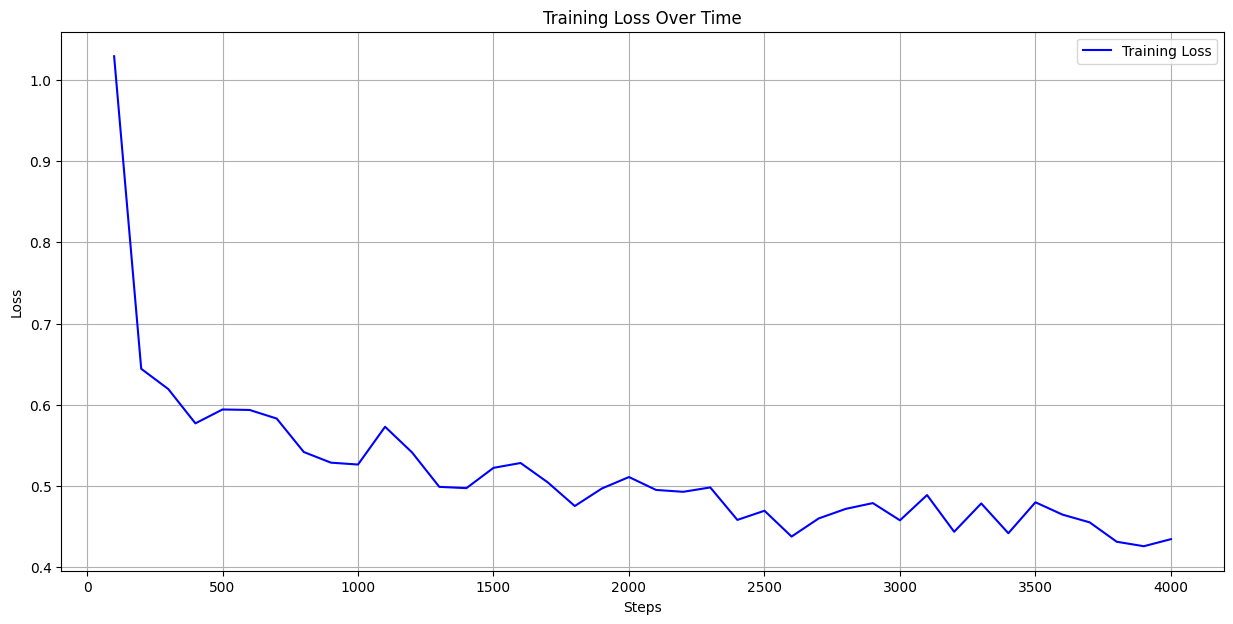

In [25]:
import matplotlib.pyplot as plt

steps = []
losses = []

for log in trainer.state.log_history:
    if 'loss' in log and 'step' in log:
        steps.append(log['step'])
        losses.append(log['loss'])

plt.figure(figsize=(15, 7))
plt.plot(steps, losses, label='Training Loss', color='blue')
plt.title('Training Loss Over Time')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [26]:
kwargs = {
    "dataset_tags": "mozilla-foundation/common_voice_17_0",
    "dataset": "Common Voice 17.0",
    "dataset_args": "config: ru, split: test",
    "language": "ru",
    "model_name": "Whisper Tiny finetuned RU",
    "finetuned_from": "openai/whisper-tiny",
    "tasks": "automatic-speech-recognition",
}

In [27]:
trainer.push_to_hub(**kwargs)

training_args.bin:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/Ailurus/whisper-tiny-finetuned-ru/commit/9bff9b8a240512d7ace5c95f20f1b793941b06ed', commit_message='End of training', commit_description='', oid='9bff9b8a240512d7ace5c95f20f1b793941b06ed', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Ailurus/whisper-tiny-finetuned-ru', endpoint='https://huggingface.co', repo_type='model', repo_id='Ailurus/whisper-tiny-finetuned-ru'), pr_revision=None, pr_num=None)